In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/airline_passengers.csv')

In [ ]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
data.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data.set_index('Month',drop = True,inplace = True)

In [ ]:
from statsmodels.tsa.api import seasonal_decompose

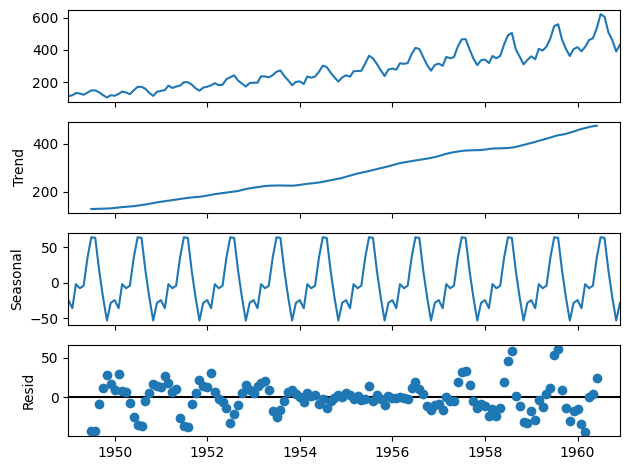

In [ ]:
result = seasonal_decompose(data)
result.plot();

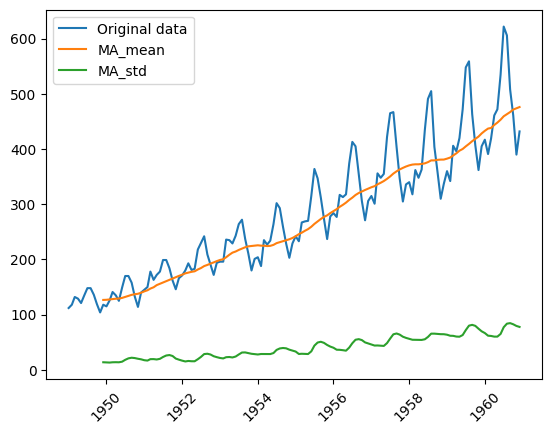

In [ ]:
ma_mean = data.rolling(window = 12).mean()
ma_std = data.rolling(window = 12).std()

plt.plot(data,label = 'Original data')
plt.plot(ma_mean,label = 'MA_mean')
plt.plot(ma_std,label = 'MA_std')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
data1 = (data-ma_mean).dropna()
adfuller(data1)

(-3.164968129955144,
 0.022104139473878875,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 906.2878851500943)

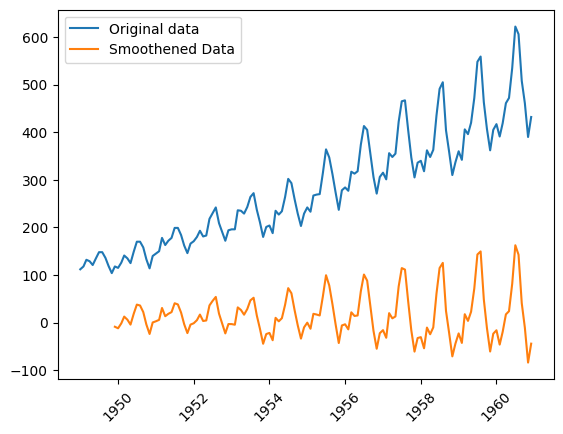

In [ ]:
plt.plot(data,label = 'Original data')
plt.plot(data1,label = 'Smoothened Data')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

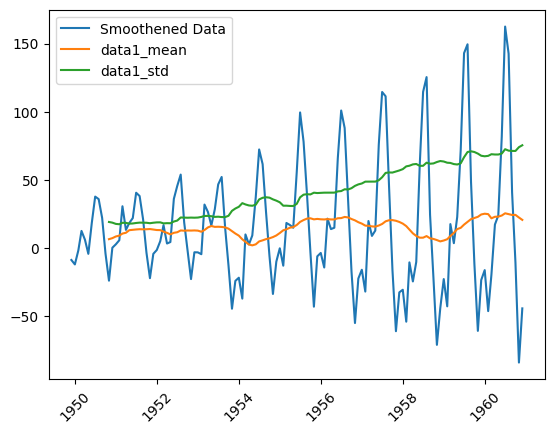

In [ ]:
data1_mean = data1.rolling(window = 12).mean()
data1_std = data1.rolling(window = 12).std()

plt.plot(data1,label = 'Smoothened Data')
plt.plot(data1_mean,label = 'data1_mean')
plt.plot(data1_std,label = 'data1_std')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

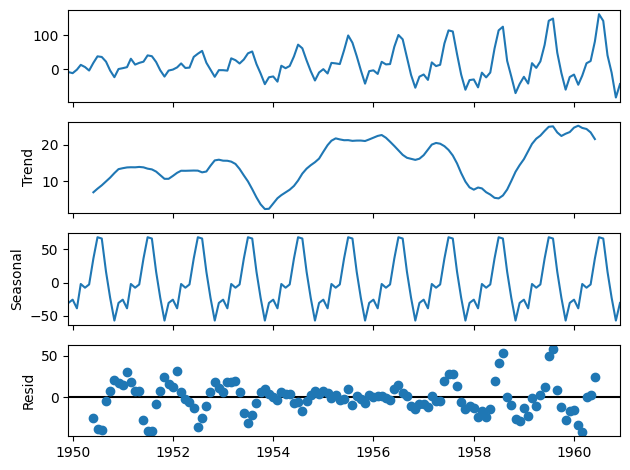

In [ ]:
result = seasonal_decompose(data1)
result.plot();

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [ ]:
simp_exp1 = SimpleExpSmoothing(data[:50]).fit(smoothing_level=0.8)
simp_exp2 = SimpleExpSmoothing(data[:50]).fit(smoothing_level=0.2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
adfuller(simp_exp1.fittedvalues),adfuller(simp_exp2.fittedvalues)

((2.252128112719539,
  0.9989227270915847,
  11,
  38,
  {'1%': -3.6155091011809297,
   '5%': -2.941262357486514,
   '10%': -2.6091995013850418},
  278.4547641557993),
 (1.1744665870702504,
  0.9958046355309057,
  11,
  38,
  {'1%': -3.6155091011809297,
   '5%': -2.941262357486514,
   '10%': -2.6091995013850418},
  184.7222629217564))

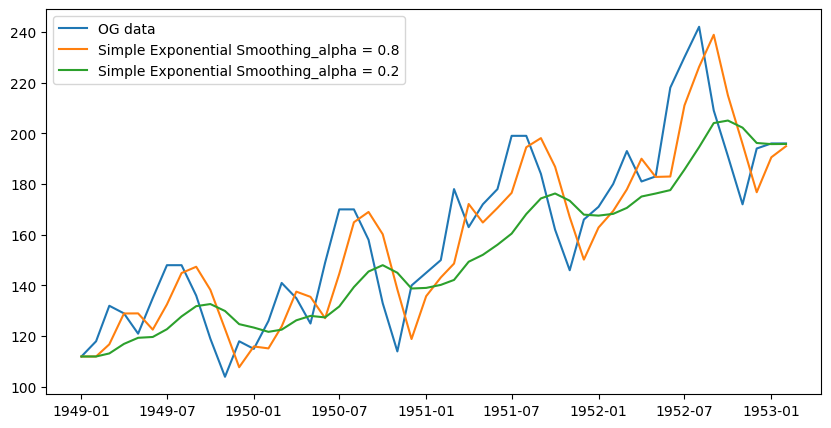

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data[:50],label = 'OG data')
plt.plot(simp_exp1.fittedvalues,label = 'Simple Exponential Smoothing_alpha = 0.8')
plt.plot(simp_exp2.fittedvalues,label = 'Simple Exponential Smoothing_alpha = 0.2')
plt.legend()
plt.show()

In [ ]:
exp = ExponentialSmoothing(data[:50],trend = 'mul').fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
adfuller(exp.fittedvalues)

(2.2581666235970306,
 0.9989270510769855,
 11,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 291.33554373789104)

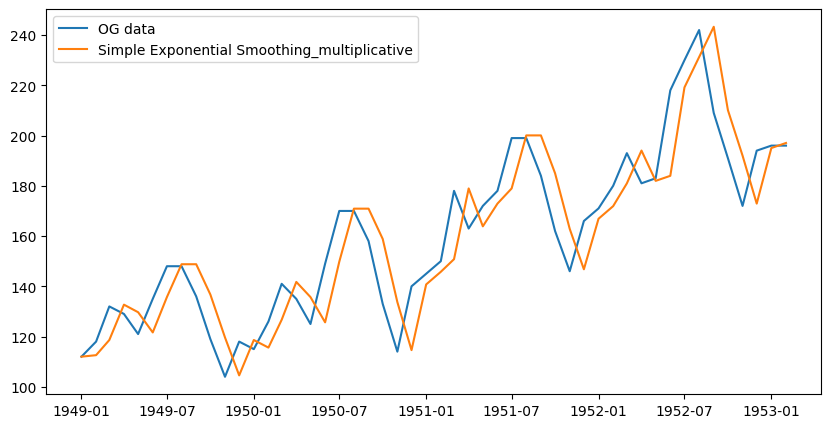

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data[:50],label = 'OG data')
plt.plot(exp.fittedvalues,label = 'Simple Exponential Smoothing_multiplicative')
plt.legend()
plt.show()

In [ ]:
holt1 = Holt(data[:50]).fit() #linear trend
holt2 = Holt(data[:50],exponential=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
adfuller(holt1.fittedvalues),adfuller(holt2.fittedvalues)

((2.26962237028489,
  0.9989350691148081,
  11,
  38,
  {'1%': -3.6155091011809297,
   '5%': -2.941262357486514,
   '10%': -2.6091995013850418},
  293.2142480087601),
 (2.156791008883953,
  0.9988450286195226,
  11,
  38,
  {'1%': -3.6155091011809297,
   '5%': -2.941262357486514,
   '10%': -2.6091995013850418},
  298.0218954509729))

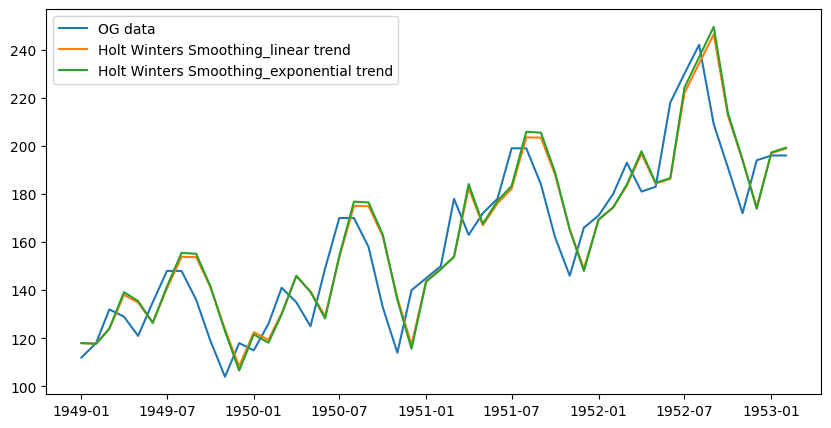

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data[:50],label = 'OG data')
plt.plot(holt1.fittedvalues,label = 'Holt Winters Smoothing_linear trend')
plt.plot(holt2.fittedvalues,label = 'Holt Winters Smoothing_exponential trend')
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

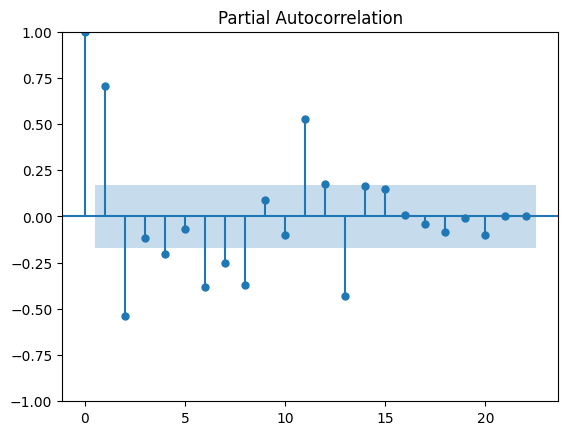

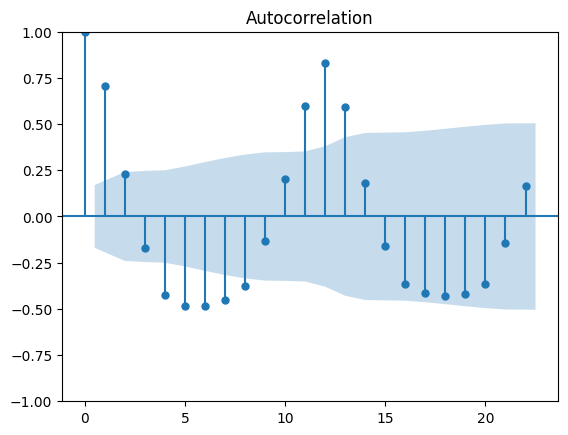

In [ ]:
plot_pacf(data1)
plot_acf(data1);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.api import ARIMA,SARIMAX

In [ ]:
model = ARIMA(data1,order = (1,0,1))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


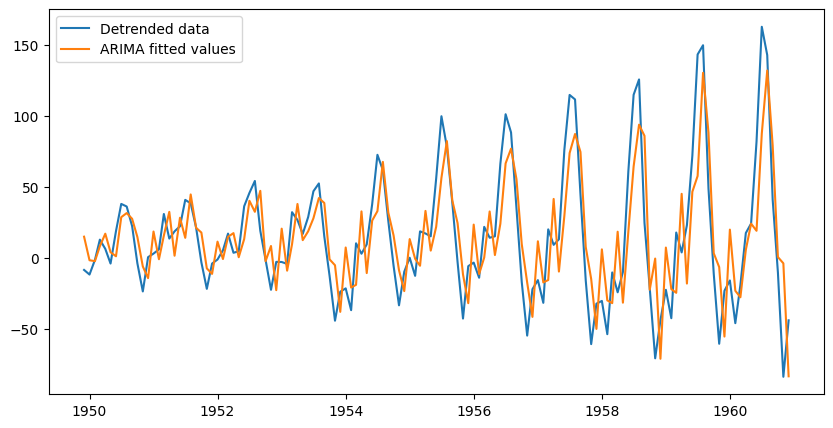

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(result.fittedvalues,label = 'ARIMA fitted values')
plt.legend()
plt.show()

In [ ]:
pred = pd.DataFrame(result.fittedvalues,columns = ['Thousands of Passengers'])
diff = pred+ma_mean.dropna()

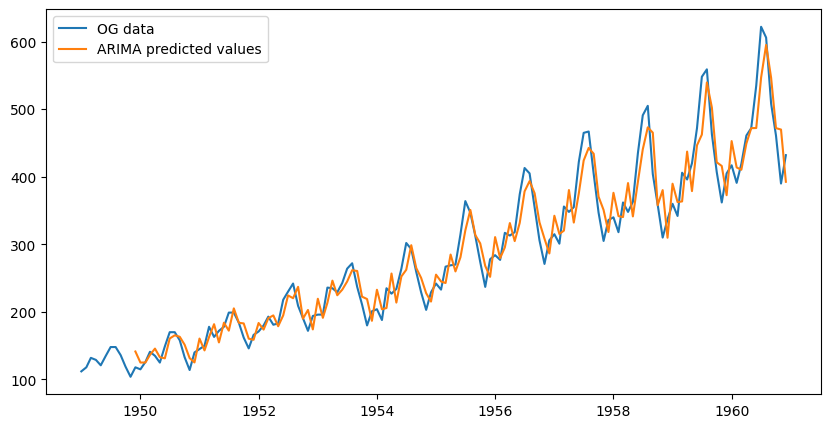

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data,label = 'OG data')
plt.plot(diff,label = 'ARIMA predicted values')
plt.legend()
plt.show()

In [ ]:
from pmdarima import auto_arima

In [ ]:
model1 = auto_arima(data1,start_p = 1,
           start_q = 1,
           max_p = 7,
           max_q = 7,
           test = 'adf',
           stationary = 'True')

In [ ]:
result1 = model1.fit(data1)

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

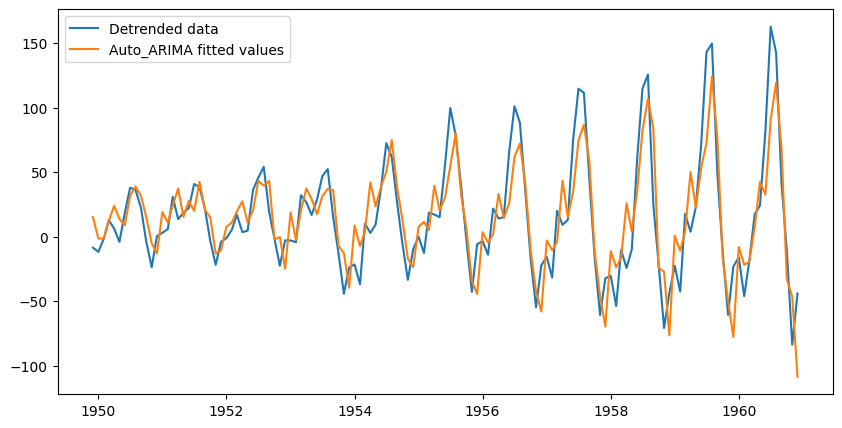

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(result1.fittedvalues(),label = 'Auto_ARIMA fitted values')
plt.legend()
plt.show()

In [ ]:
auto_pred = pd.DataFrame(result1.fittedvalues(),columns = ['Thousands of Passengers'])
diff_auto = auto_pred+ma_mean.dropna()

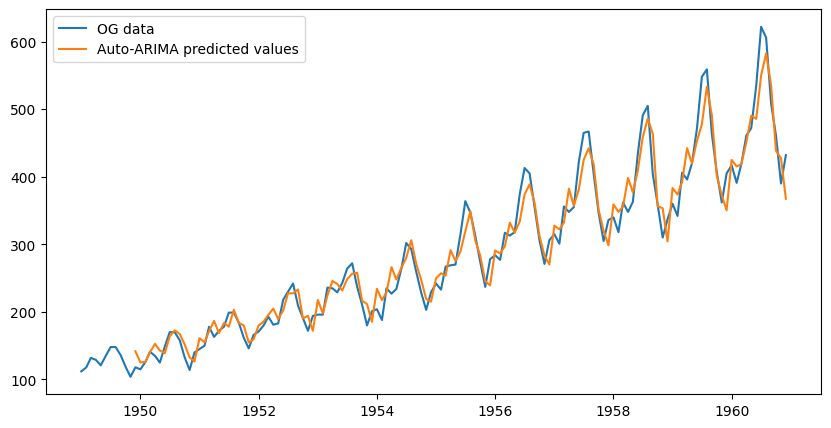

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data,label = 'OG data')
plt.plot(diff_auto,label = 'Auto-ARIMA predicted values')
plt.legend()
plt.show()

In [ ]:
predict = result.predict('1961-01-01','1961-12-01')

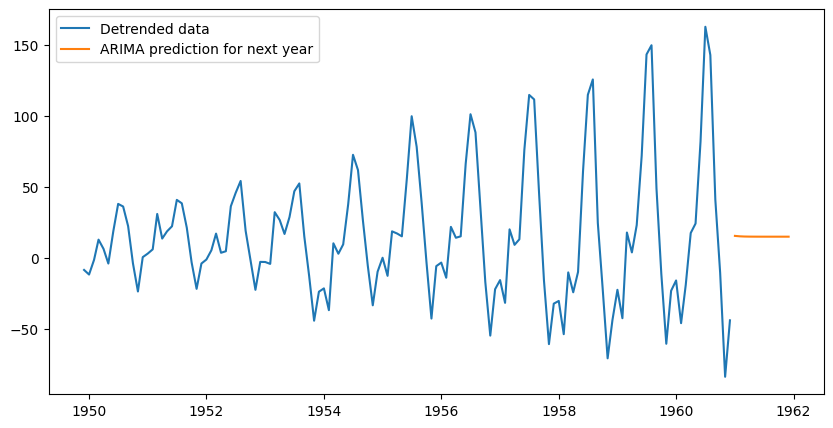

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(predict,label = 'ARIMA prediction for next year')
plt.legend()
plt.show()

In [ ]:
auto_predict = result1.predict(12)

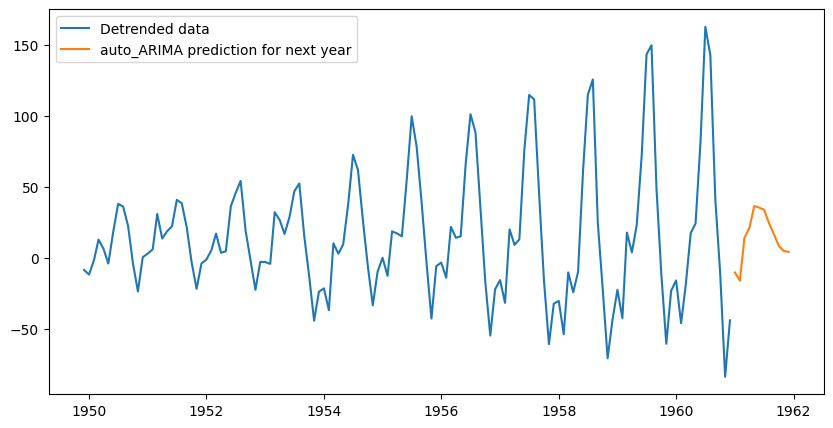

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(auto_predict,label = 'auto_ARIMA prediction for next year')
plt.legend()
plt.show()

In [ ]:
Sar_model = SARIMAX(data1,order = (1,0,1),seasonal_order=(1,0,1,12))
Sar_model = Sar_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


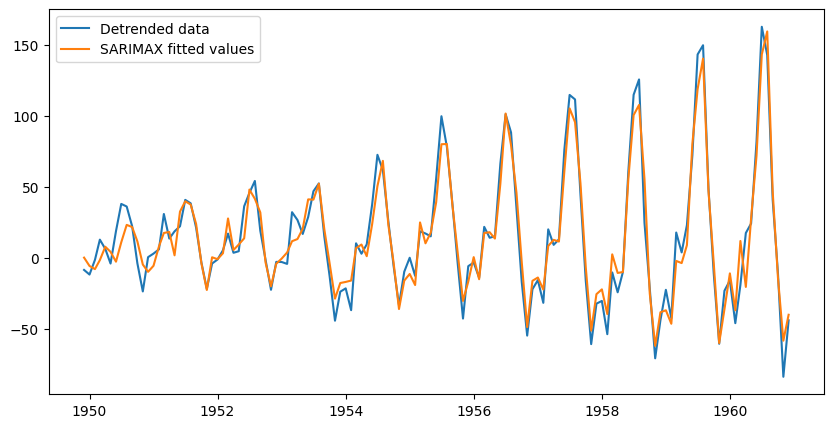

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(Sar_model.fittedvalues,label = 'SARIMAX fitted values')
plt.legend()
plt.show()

In [ ]:
res = pd.DataFrame(Sar_model.fittedvalues,columns = ['Thousands of Passengers'])
res_S = res+ma_mean.dropna()

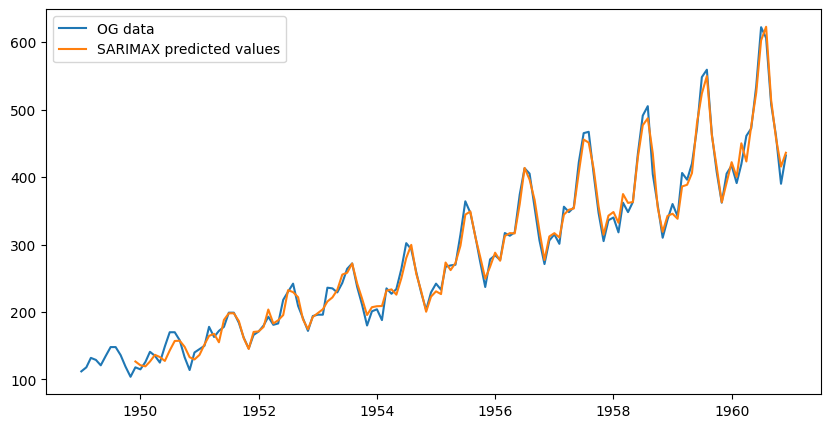

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data,label = 'OG data')
plt.plot(res_S,label = 'SARIMAX predicted values')
plt.legend()
plt.show()

In [ ]:
Sar_model1 = SARIMAX(data1,order = (3,0,2),seasonal_order=(3,0,2,12))
Sar_model1 = Sar_model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


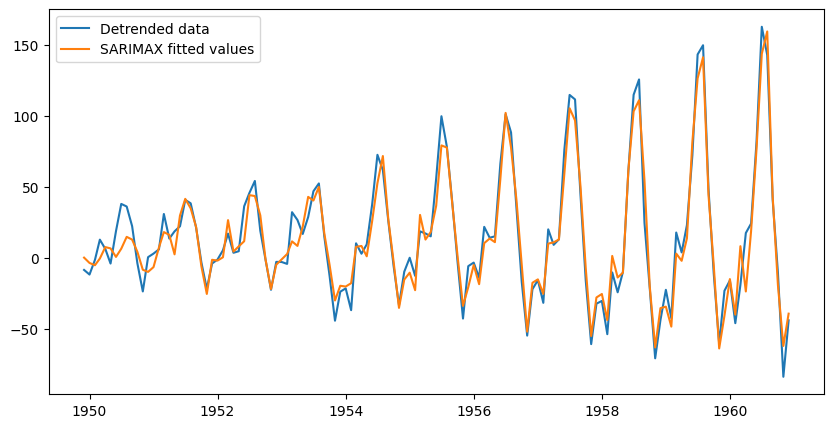

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(Sar_model1.fittedvalues,label = 'SARIMAX fitted values')
plt.legend()
plt.show()

In [ ]:
res1 = pd.DataFrame(Sar_model1.fittedvalues,columns = ['Thousands of Passengers'])
res_S1 = res+ma_mean.dropna()

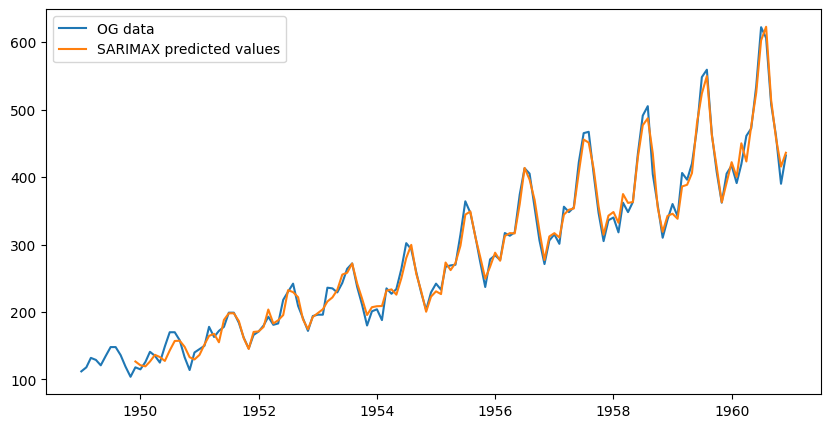

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data,label = 'OG data')
plt.plot(res_S1,label = 'SARIMAX predicted values')
plt.legend()
plt.show()

In [ ]:
Sar_pred = Sar_model.predict('1961-01-01','1961-12-01')

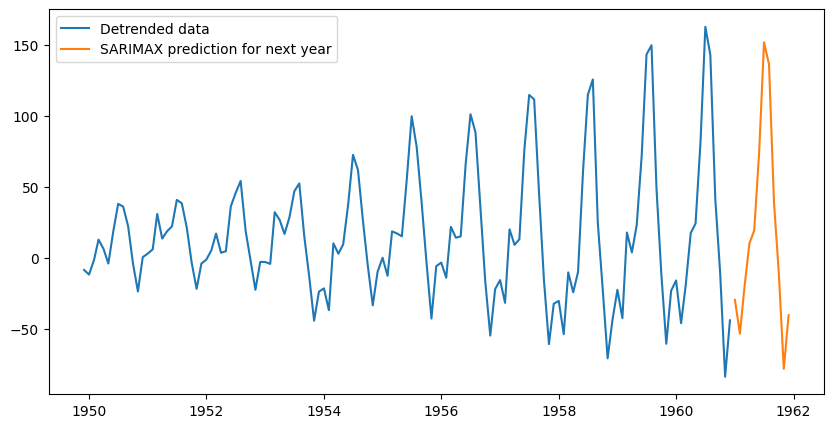

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(Sar_pred,label = 'SARIMAX prediction for next year')
plt.legend()
plt.show()

In [ ]:
Sar_pred1 = Sar_model1.predict('1961-01-01','1961-12-01')

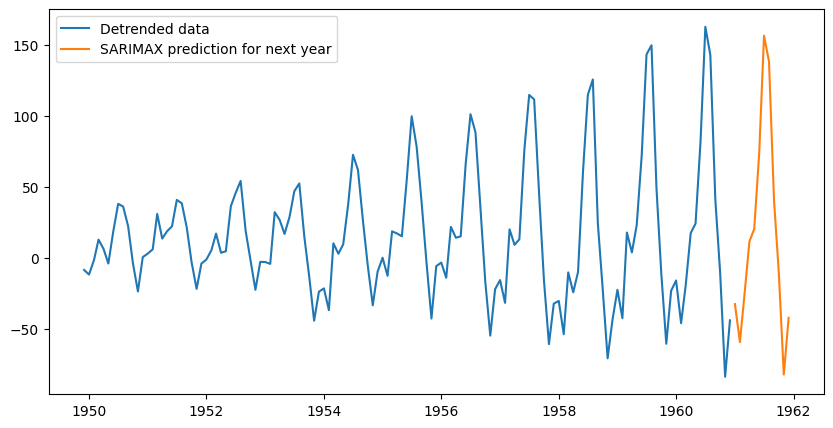

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(Sar_pred1,label = 'SARIMAX prediction for next year')
plt.legend()
plt.show()

In [ ]:
forecast_sar = Sar_model.forecast(steps=60)
forecast_sar1 = Sar_model1.forecast(steps=60)

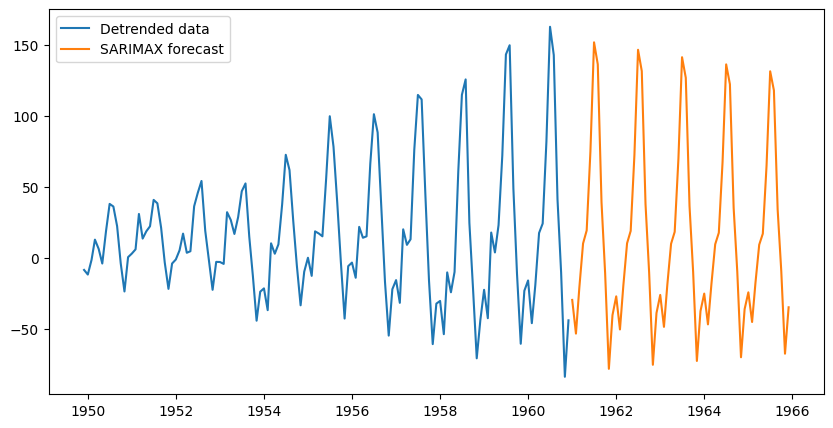

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(forecast_sar,label = 'SARIMAX forecast')
plt.legend()
plt.show()

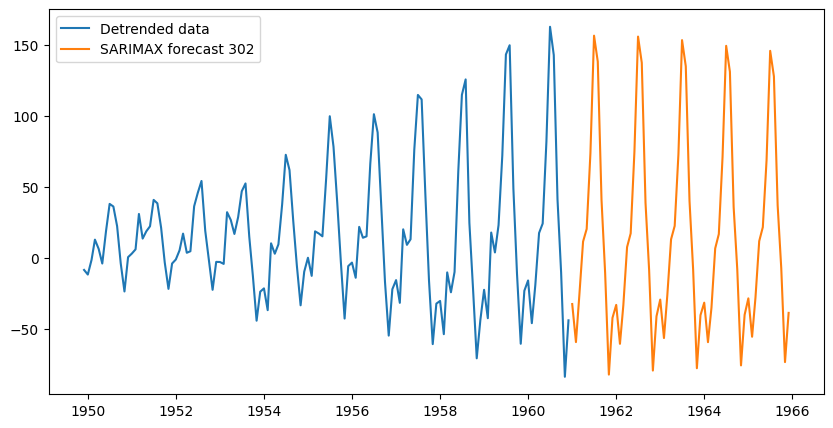

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(data1,label = 'Detrended data')
plt.plot(forecast_sar1,label = 'SARIMAX forecast 302')
plt.legend()
plt.show()